In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import fftpack
from scipy.fftpack import fft, ifft,fft2,ifft2
from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator
from IPython.display import Image
from math import sqrt, pi, erf
from scipy.stats import poisson
from scipy import stats

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 3.4661629670697414


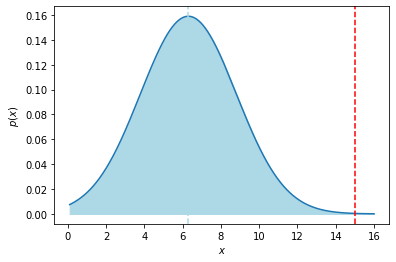

In [53]:
x0 = 15
mu = 6.3
sigma = poisson.std(mu, loc=0)

# determine the Z score
Z = abs(x0 - mu) / sigma
print("Z =", Z)

# plot the measurement and its assumed pdf
w = mu - x0
x = np.linspace(mu - w +1, w + mu +2.5, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x - mu) > w, color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

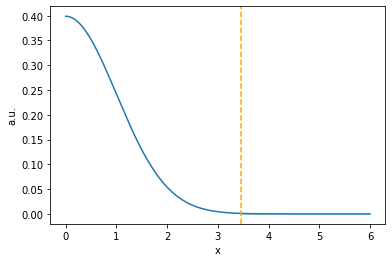

p-value = 0.00026397158691493505


In [54]:
# plot the test statistics and its pdf
xs = np.linspace(0, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

# calculate the p-value
pvalue = 1. - stats.norm.cdf(Z)
print("p-value =", pvalue)

### Answer to ex1

The probability to observe 15 or more hurricanes  in a single year is 0.00026397158691493505 (as we can see from the plot and from the numeric result above), which is smaller than 
$ \alpha$. So it's safe to reject the null hypothesis, in fact 6.3 and 15 are significantly different and looking to the probabilities in the plot above it is very unlikely to observe 15 or more hurricanes  in a single year.

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -3.786997938137629


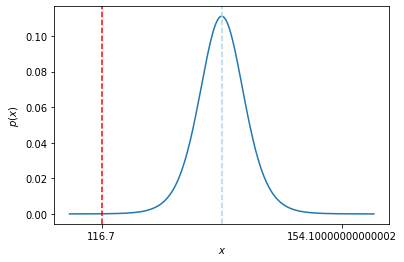

In [56]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma1 = np.var(pre, ddof=1)
sigma2 = np.var(post, ddof=1)

sigma = np.sqrt((sigma1+sigma2)/2)

sample_mean1 = np.mean(pre) # mean of the samples pre
sample_mean2 = np.mean(post) # mean of the samples post
n = len(pre)

# calculate the test statistics
T = (sample_mean1 - sample_mean2) / (sigma * np.sqrt(2/n))
print("T =", T)


w = sample_mean2 - sample_mean1

x = np.linspace(sample_mean2 - w - 5, w + sample_mean2 + 5, 1000)
y = stats.t.pdf(x, loc=sample_mean2, scale=sigma / np.sqrt(n), df=n - 1)
plt.plot(x, y)
plt.axvline(sample_mean1, linestyle='--', color='red') #the mean of the pre samples
plt.axvline(sample_mean2, linestyle='--', color='lightblue') #the mean of the post samples
plt.xticks([sample_mean2 - w, sample_mean2 + w], [sample_mean2 - w, sample_mean2 + w])
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

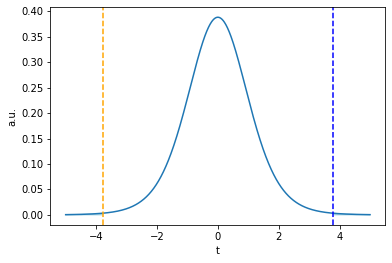

p-value = 0.004302464132864604


In [37]:
# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

### Answer to ex2

Since the p-value is $< \alpha/2$, we reject the null hypothesis. It means that the change in blood pressures within our sample was statistically significant.

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

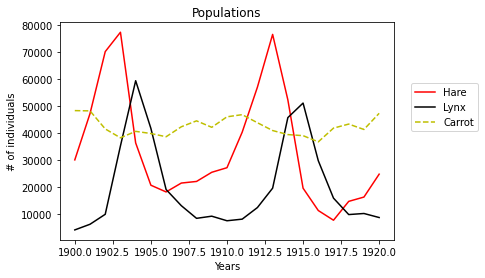

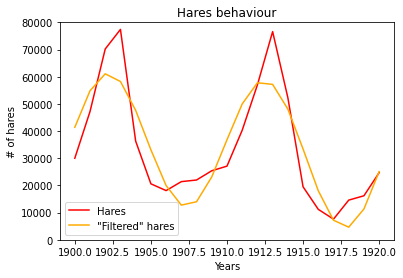

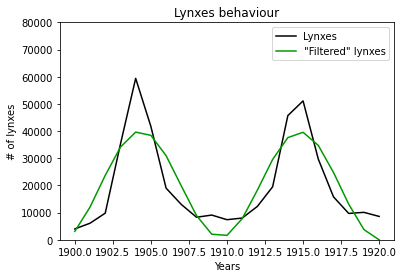

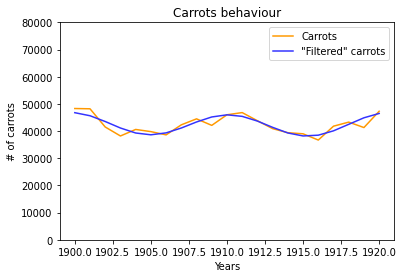

The period of the population for Hares is:  10.5
The period of the population for Lynxes is:  10.5
The period of the population for Carrots is:  10.5


In [47]:
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T

plt.title("Populations")
plt.plot(year, hares, "r", year, lynxes, "k", year, carrots, "y--") 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))
plt.xlabel('Years')
plt.ylabel('# of individuals')
plt.show()

fft_hares = fftpack.fft(hares)
fft_lynxes = fftpack.fft(lynxes)
fft_carrots = fftpack.fft(carrots)

power_hares = np.abs(fft_hares)
power_lynxes = np.abs(fft_lynxes)
power_carrots = np.abs(fft_carrots)

sample_freqs = fftpack.fftfreq(hares.size)

mask = np.where(sample_freqs > 0)

freqs = sample_freqs[mask]

peak_h = freqs[power_hares[mask].argmax()]
peak_l = freqs[power_lynxes[mask].argmax()]
peak_c = freqs[power_carrots[mask].argmax()]

high_freq_h = fft_hares.copy()
high_freq_l = fft_lynxes.copy()
high_freq_c = fft_carrots.copy()

high_freq_h[np.abs(sample_freqs)>peak_h] = 0
high_freq_l[np.abs(sample_freqs)>peak_l] = 0
high_freq_c[np.abs(sample_freqs)>peak_c] = 0

filtered_h = fftpack.ifft(high_freq_h)
filtered_l = fftpack.ifft(high_freq_l)
filtered_c = fftpack.ifft(high_freq_c)


# limit of y axis on the plot
ybounds = [0, 80000]


plt.title("Hares behaviour")
plt.plot(year, hares, label='Hares', color='r')
plt.plot(year, filtered_h, label='"Filtered" hares', color="#ffaa00")
plt.xlabel('Years')
plt.ylabel('# of hares')
plt.ylim(ybounds)
plt.legend()
plt.show()

plt.title("Lynxes behaviour")
plt.plot(year, lynxes, label='Lynxes', color="#000000")
plt.plot(year, filtered_l, label='"Filtered" lynxes', color="#009900")
plt.xlabel('Years')
plt.ylabel('# of lynxes')
plt.ylim(ybounds)
plt.legend()
plt.show()

plt.title("Carrots behaviour")
plt.plot(year, carrots, label='Carrots', color='#ff9900')
plt.plot(year, filtered_c, label='"Filtered" carrots', color="#3333ff")
plt.xlabel('Years')
plt.ylabel('# of carrots')
plt.ylim(ybounds)
plt.legend()
plt.show()

print('The period of the population for Hares is: ', 1/peak_h)
print('The period of the population for Lynxes is: ', 1/peak_l)
print('The period of the population for Carrots is: ', 1/peak_c)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

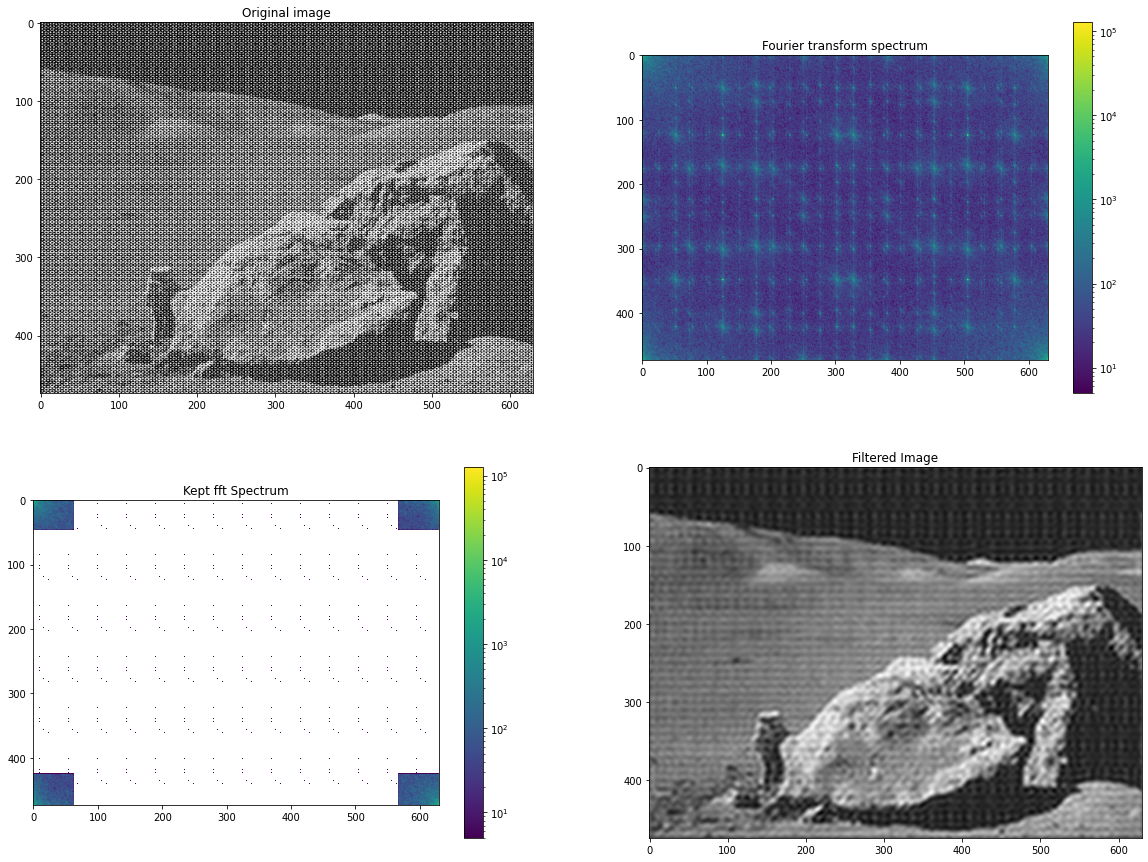

In [52]:
gridsize = (2, 2) 
fig = plt.figure(figsize=(20, 15))
ax1 = plt.subplot2grid(gridsize, (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid(gridsize, (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid(gridsize, (1, 0), rowspan=1, colspan=1)
ax4 = plt.subplot2grid(gridsize, (1, 1), rowspan=1, colspan=1)

# Plot of the original image
moon_original = plt.imread('moonlanding.png')
ax1.imshow(moon_original, plt.cm.gray)
ax1.set_title('Original image')

# Plot the fourier transform spectrum
image_fft = fftpack.fft2(moon_original) 
image_fft_col=ax2.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
plt.colorbar(image_fft_col, ax=ax2) # to understand the meaning of the colours
ax2.set_title('Fourier transform spectrum')

# Cut the redundant information from the fourier transform plot
keep = 0.1 # fraction of coefficients to keep
image_fft2 = image_fft.copy()
rows, cols = image_fft2.shape
# Set to zero all rows with indices between rows*keep and rows*(1-keep), and similarly for the columns
image_fft2[int(rows*keep):int(rows*(1-keep)), :] = 0 #rows
image_fft2[:, int(cols*keep):int(cols*(1-keep))] = 0 #columns
image_fft2_col=ax3.imshow(np.abs(image_fft2), norm=LogNorm(vmin=5))
plt.colorbar(image_fft2_col, ax=ax3) # to understand the meaning of the colours
ax3.set_title('Kept fft Spectrum')

# Reconstruct the denoised image from the filtered spectrum
# only real part for display
image_new = fftpack.ifft2(image_fft2).real 
ax4.imshow(image_new, plt.cm.gray)
ax4.set_title('Filtered Image')

plt.show()